## Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LogisticRegression     # Regression Logistic
from sklearn.neighbors import KNeighborsClassifier      # K Near Neighbors
from sklearn.svm import SVC                             # Support Vector Machines
from sklearn.tree import DecisionTreeClassifier         # Decision tree
from sklearn.ensemble import BaggingClassifier          # Ensemble models: Bagging
from sklearn.ensemble import RandomForestClassifier     # Ensemble models: Random Forest
from sklearn.ensemble import StackingClassifier         # Ensemble models: Stacking
from sklearn.ensemble import GradientBoostingClassifier # Ensemble models: Gradient Boosting GB
from sklearn.ensemble import AdaBoostClassifier         # Ensemble models: GB AdaBoost

from xgboost import XGBClassifier                       # Ensemble models: GB XgBoost
from sklearn.ensemble import VotingClassifier


from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, accuracy_score

ImportError: Unable to import required dependencies:
numpy: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

In [2]:
data = pd.read_csv("Crop_Recommendation.csv")

In [3]:
data.head(3)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
X = data[data.columns[:-1]]
Y = data[["Crop"]]

In [6]:
Y.value_counts()

Crop       
Apple          100
Banana         100
Blackgram      100
ChickPea       100
Coconut        100
Coffee         100
Cotton         100
Grapes         100
Jute           100
KidneyBeans    100
Lentil         100
Maize          100
Mango          100
MothBeans      100
MungBean       100
Muskmelon      100
Orange         100
Papaya         100
PigeonPeas     100
Pomegranate    100
Rice           100
Watermelon     100
Name: count, dtype: int64

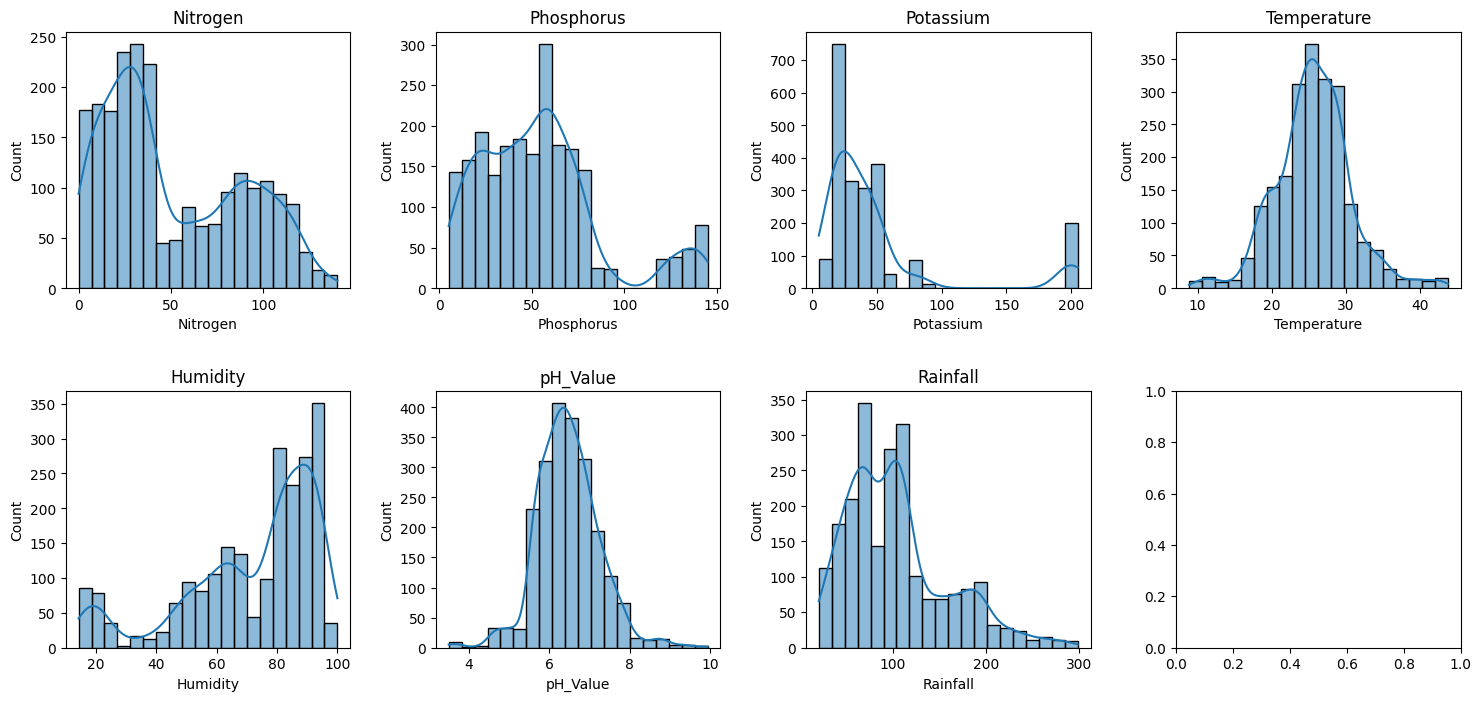

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18,8))

# Plot KDE plots for each column
for i, ax in enumerate(axes.ravel()):
    if i!=7:
        sns.histplot(X.iloc[:,i], kde=True, ax=ax, bins=20)
        ax.set_title(f'{X.columns[i]}', fontsize=12)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


# Logistic Regression

In [8]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

label_encoder = LabelEncoder()
Y_enco = label_encoder.fit_transform(Y.values.ravel())

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y_enco, 
                                                    test_size=0.2, 
                                                    stratify=Y_enco, 
                                                    random_state=10)

In [12]:
score1 = []
C = np.linspace(0.2,2,20)

for i,c in enumerate(C):
    lr = LogisticRegression(random_state=20,  max_iter=1000, penalty='l1', C=c, solver='saga')
    lr.fit(X_train, Y_train)
    lr_pred = lr.predict(X_test)
    score1.append(fbeta_score(Y_test,lr_pred, beta=1, average='micro'))

score2 = []
for i,c in enumerate(C):
    lr = LogisticRegression(random_state=20,  max_iter=1000, penalty='l2', C=c, solver='saga')
    lr.fit(X_train, Y_train)
    lr_pred = lr.predict(X_test)
    score2.append(fbeta_score(Y_test, lr_pred, beta=1, average='micro'))

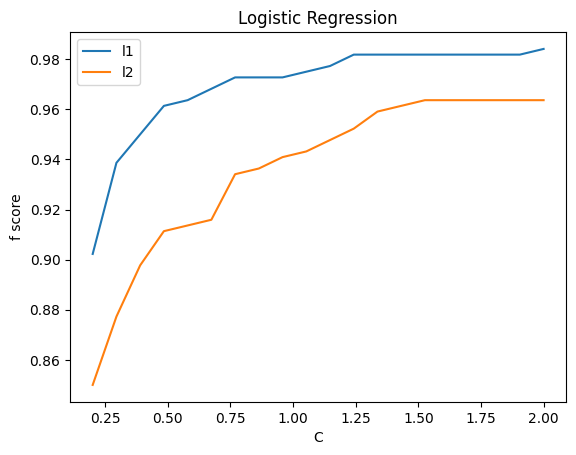

In [13]:
plt.plot(C, score1, label="l1")
plt.plot(C, score2, label="l2")
plt.xlabel("C")
plt.ylabel("f score")
plt.title("Logistic Regression")
plt.legend()
plt.show()

In [14]:
f1_lr = max(score1)
f1_lr

np.float64(0.9840909090909091)

In [19]:
model_lr = LogisticRegression(random_state=20, 
                              max_iter=1000, 
                              solver='saga', 
                              C=1.5,
                              penalty='l1')
model_lr.fit(X_train, Y_train)

LogisticRegression(C=1.5, max_iter=1000, penalty='l1', random_state=20,
                   solver='saga')

In [20]:
filename = 'model_lr.pkl'
pickle.dump(model_lr, open(filename, 'wb'))

# KNN

In [23]:
max_k = 50
f1_scores = []
accuracy = []

In [25]:
for i in range(1,max_k):
    knn = KNeighborsClassifier( n_neighbors=i )
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)

    f1_scores.append( fbeta_score(Y_test, pred, beta=1, average='micro') )
    accuracy.append( accuracy_score(Y_test, pred) )
    

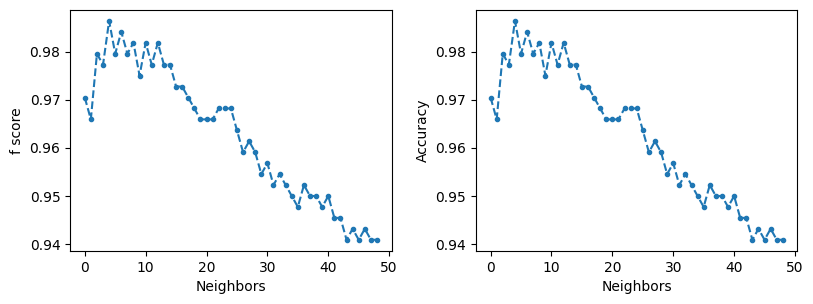

In [37]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8,3))
fig.tight_layout(w_pad=3)

axs[0].plot(f1_scores, "--.")
axs[0].set_ylabel("f score")
axs[0].set_xlabel('Neighbors')

axs[1].plot(accuracy, "--.")
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel('Neighbors')

plt.show()

In [38]:
f1_knn = max(f1_scores)
f1_knn

np.float64(0.9863636363636363)

In [40]:
model_knn = KNeighborsClassifier( n_neighbors=5 )
model_knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [42]:
pickle.dump( model_knn, open("model_knn.pkl", "wb"))

# SVM

In [43]:
par_grid = {
    'C': [1,5,10,15,20,25,30],
    'kernel' : ['poly', 'rbf', 'sigmoid']
}

In [44]:
model = SVC()

In [45]:
grid_search = GridSearchCV(estimator = model, 
                           param_grid = par_grid, 
                           cv = 5, 
                           scoring ='f1_micro',
                           verbose = 1)

In [46]:
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [47]:
best_params

{'C': 20, 'kernel': 'rbf'}

In [48]:
grid_search.best_score_

np.float64(0.9892045454545455)

In [49]:
model_SVC = SVC( C=20, kernel='rbf' )
model_SVC.fit( X_train, Y_train )

SVC(C=20)

In [50]:
pickle.dump( model_SVC, open("model_SVC.pkl", "wb") )

# Desicion Tree

In [51]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}
model = DecisionTreeClassifier(random_state=20)

In [52]:
grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1_micro',
                        cv = 5, 
                        verbose = 1)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [53]:
f1_tree = grid_search.best_score_
f1_tree

np.float64(0.9852272727272726)

In [54]:
best_params

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1}

In [56]:
model_tree = DecisionTreeClassifier( criterion='gini', max_depth=15, min_samples_leaf=1, random_state=20 )
model_tree. fit( X_train, Y_train )

DecisionTreeClassifier(max_depth=15, random_state=20)

In [57]:
pickle.dump( model_tree, open("model_tree.pkl", "wb"))

# Ensemble models

### Bagging

In [64]:
param_grid = {
    'n_estimators': [2*n+1 for n in range(10)],
    'estimator__max_depth' : [2*n+1 for n in range(10) ] }

Bag = BaggingClassifier(estimator = DecisionTreeClassifier(), 
                        random_state=20, 
                        bootstrap=True)

In [66]:
param_grid

{'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 'estimator__max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

In [67]:
search = GridSearchCV(estimator=Bag, 
                      param_grid=param_grid, 
                      scoring='f1_micro', 
                      cv=3)

In [68]:
search.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=20),
             param_grid={'estimator__max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                                  19],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='f1_micro')

In [69]:
f1_baggin = search.best_score_
f1_baggin

np.float64(0.9920451263922724)

In [70]:
search.best_params_

{'estimator__max_depth': 13, 'n_estimators': 13}

In [72]:
model_bagging = BaggingClassifier(estimator=DecisionTreeClassifier( max_depth=13 ),
                                  n_estimators=13, 
                                  random_state=20,
                                  bootstrap=True)
model_bagging.fit( X_train, Y_train )

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=13),
                  n_estimators=13, random_state=20)

In [73]:
pickle.dump( model_bagging, open("model_bagging_DT.pkl", "wb") )

### Random Forest

In [91]:
model = RandomForestClassifier(random_state=20)

In [92]:
param_grid = {'n_estimators': [2*n+1 for n in range(14)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["sqrt", "log2"]}

In [93]:
param_grid

{'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27],
 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 'max_features': ['sqrt', 'log2']}

In [94]:
search = GridSearchCV(estimator=model, 
                      param_grid=param_grid,
                      scoring='f1_micro')

search.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=20),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27]},
             scoring='f1_micro')

In [95]:
search.best_score_

np.float64(0.9943181818181819)

In [96]:
search.best_params_

{'max_depth': 11, 'max_features': 'sqrt', 'n_estimators': 27}

In [99]:
model_rf = RandomForestClassifier(max_depth=11,
                                  max_features='sqrt',
                                  n_estimators=27)
model_rf.fit( X_train, Y_train )

RandomForestClassifier(max_depth=11, n_estimators=27)

In [101]:
pickle.dump( model_rf, open("model_rf.pkl", "wb") )

### Stacking

In [16]:
Y_train

array([14,  1, 16, ...,  1, 10, 18])

In [9]:
#estimators = [('SVM',SVC(random_state=42, max_iter=100)),('KNN',KNeighborsClassifier()),('dt',DecisionTreeClassifier())]
estimators = [('KNN',KNeighborsClassifier()),('dt',DecisionTreeClassifier())]

In [18]:
clf = StackingClassifier( estimators=estimators, 
                         final_estimator= LogisticRegression())
#clf.fit(X_train, Y_train)
#clf


param_grid = {
    'dt__max_depth': [n for n in range(1,10)], # dont use 0
    'dt__random_state':[20],
    #'SVM__C':[0.01,0.1,1],
    #'SVM__kernel':['linear', 'poly', 'rbf'],
    'KNN__n_neighbors':[1,4,8,9] 
    }

In [22]:
search = GridSearchCV(estimator=clf, 
                      scoring='f1_micro',
                      cv=5,
                      param_grid=param_grid)
search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('KNN',
                                                       KNeighborsClassifier()),
                                                      ('dt',
                                                       DecisionTreeClassifier())],
                                          final_estimator=LogisticRegression()),
             param_grid={'KNN__n_neighbors': [1, 4, 8, 9],
                         'dt__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'dt__random_state': [20]},
             scoring='f1_micro')

In [23]:
search.best_score_

np.float64(0.9909090909090909)

In [24]:
search.best_params_

{'KNN__n_neighbors': 8, 'dt__max_depth': 9, 'dt__random_state': 20}

In [25]:
model_st = clf = StackingClassifier(estimators=[("rf", DecisionTreeClassifier(random_state=20, max_depth=9)),
                                                ("knn",KNeighborsClassifier(n_neighbors=8))], 
                                    final_estimator= LogisticRegression())

In [26]:
pickle.dump(model_st, open("model_st.pkl", "wb"))

### AdaBoost

In [30]:
ABC = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                         algorithm='SAMME')

param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.1, 0.01, 0.001]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid,
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, Y_train)



--------------------------------------------------------------------------------
LokyProcess-13 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/mnt/c/Users/USUARIO/Documents/galois/IBM-Machine-Learning/.env/lib/python3.10/site-packages/numpy/_core/__init__.py", line 23, in <module>
    from . import multiarray
  File "/mnt/c/Users/USUARIO/Documents/galois/IBM-Machine-Learning/.env/lib/python3.10/site-packages/numpy/_core/multiarray.py", line 10, in <module>
    from . import overrides
  File "/mnt/c/Users/USUARIO/Documents/galois/IBM-Machine-Learning/.env/lib/python3.10/site-packages/numpy/_core/overrides.py", line 8, in <module>
    from numpy._core._multiarray_umath import (
ImportError: libscipy_openblas64_-99b71e71.so: cannot open shared object file: No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
 

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {EXIT(1)}

In [122]:
GV_ABC.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [128]:
model_AB_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                              n_estimators=100,
                              learning_rate=0.1,
                              algorithm='SAMME')

In [129]:
model_lr
model_knn
model_SVC
model_tree
model_bagging
model_rf

model_stacking

model_AB_boost

NameError: name 'model_stacking' is not defined

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)